In [1]:
%matplotlib inline

In [9]:
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature

In [3]:
ncf = nc.NCFile('/data/detectors/2016-06-11_123327_Tc.nc')

In [4]:
ncf.node_names()

[u'sweep']

In [12]:
swp = ncf.sweep

In [13]:
temperature.add_temperature(swp, 'hpd')

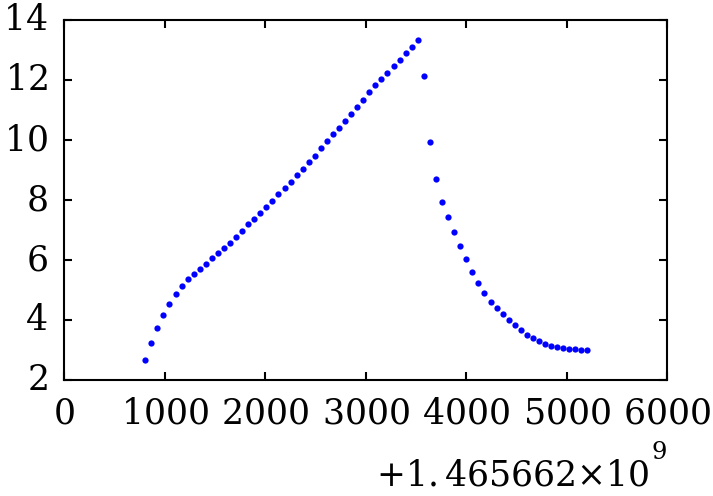

In [28]:
fig, ax = plt.subplots()

for sa in swp.stream_arrays:
    ax.plot(sa.epoch, sa.state.temperature.primary_package, '.b')

Why is there a jump in the transmission as soon as the PTC is turned on?

In [44]:
T_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=2, vmax=14), cmap=mpl.cm.hot)
epoch_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=swp.stream_arrays[0].epoch,
                                                                 vmax=swp.stream_arrays[-1].epoch),
                                                                 cmap=mpl.cm.coolwarm)

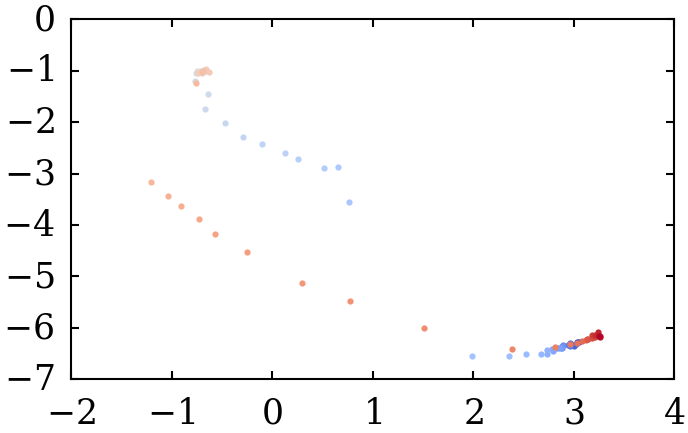

In [45]:
fig, ax = plt.subplots()

for sa in swp.stream_arrays:
    ax.plot(sa[0].s21_point.real, sa[0].s21_point.imag, '.',
            color=epoch_mappable.to_rgba(sa.epoch))

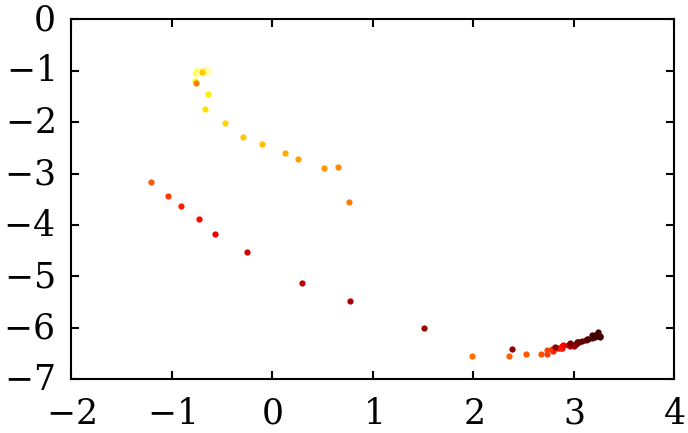

In [40]:
fig, ax = plt.subplots()

for sa in swp.stream_arrays:
    ax.plot(sa[0].s21_point.real, sa[0].s21_point.imag, '.',
            color=T_mappable.to_rgba(sa[0].state.temperature.primary_package))

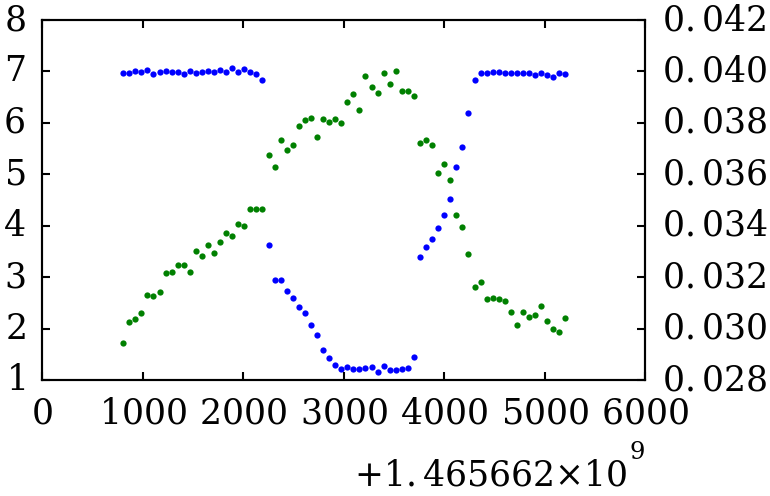

In [30]:
fig, ax = plt.subplots()
e_ax = ax.twinx()

for sa in swp.stream_arrays:
    ax.plot(sa.epoch, np.abs(sa[0].s21_point), '.b')
    e_ax.plot(sa.epoch, np.abs(sa[0].s21_point_error), '.g')

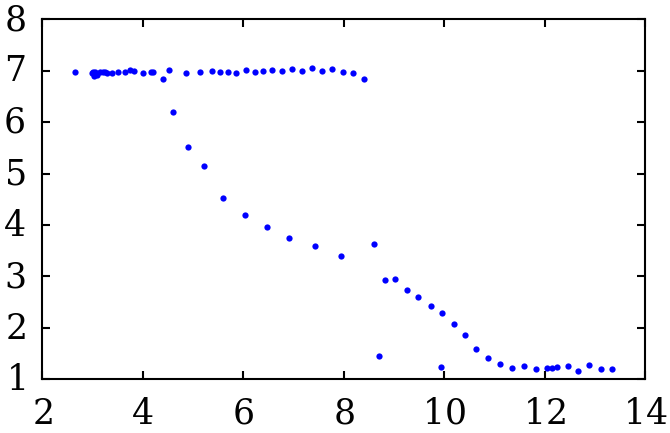

In [26]:
fig, ax = plt.subplots()

for sa in swp.stream_arrays:
    ax.plot(sa.state.temperature.primary_package, np.abs(sa[0].s21_point), '.b')